In [129]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import compute_sample_weight
from xgboost import XGBClassifier

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('drive/MyDrive/LUAN-VAN/Nhi/Predictive-Maintenance-for-Air-Quality/data/temp-label.csv')
df = df.dropna()
# Assuming your dataset has columns like 'Sensor1', 'Sensor2', ..., 'Label'
# Adjust the column names accordingly

# Separate features (X) and labels (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize a Random Forest classifier (you can experiment with other algorithms)
clf = RandomForestClassifier(n_estimators=100)
# clf = RandomForestClassifier(max_depth=6)


# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# print(y_pred)
df_test = df.loc[X_test.index].copy()  # Create a copy of the test set from the original dataset
df_test['Predicted_Label'] = y_pred  # Add the predicted labels to the copied test set
# Update the original dataset with the predictions
df.update(df_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
df_test



# Visualize the feature importances if needed
# feature_importances = clf.feature_importances_
# features = X.columns
# feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# feature_df = feature_df.sort_values(by='Importance', ascending=False)

# # Plotting feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_df['Feature'], feature_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importances')
# plt.show()


,humid,temp,press,gas,tvoc,altitude,eCO2,H2,quality,Predicted_Label
2175,47.70,27.43,1010.09,75.82901,26.34,26.34,26.34,26.34,good,good
2176,47.71,27.43,1010.08,75.89601,26.45,26.45,26.45,26.45,good,good
1738,52.81,26.77,1011.72,67.49200,12.72,12.72,12.72,12.72,good,good
2576,42.00,26.18,1012.56,110.08300,5.71,5.71,5.71,5.71,good,good
2991,51.26,33.71,1012.13,131.95800,16.00,9.31,404.00,13998.00,poor,poor
...,...,...,...,...,...,...,...,...,...,...
2038,55.29,27.85,1007.10,55.36300,51.36,51.36,51.36,51.36,good,good
2972,51.35,33.47,1012.17,132.26500,2.00,9.00,406.00,14014.00,poor,poor
2087,54.51,27.77,1007.21,72.48001,50.37,50.37,50.37,50.37,good,good
384,58.17,28.26,1010.50,56.53700,22.92,22.92,22.92,22.92,good,good


In [132]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       494
        poor       1.00      1.00      1.00       127

    accuracy                           1.00       621
   macro avg       1.00      1.00      1.00       621
weighted avg       1.00      1.00      1.00       621

Accuracy: 1.00
Confusion Matrix:
[[494   0]
 [  0 127]]


In [133]:
# Load dataset
sensor_file = "drive/MyDrive/LUAN-VAN/Nhi/Predictive-Maintenance-for-Air-Quality/data/sensor_data.csv"
quality_file = "drive/MyDrive/LUAN-VAN/Nhi/Predictive-Maintenance-for-Air-Quality/data/quality_control_data.csv"
# names = ['weight', 'humidity', 'temperature', 'quality']
sensor_data = pandas.read_csv(sensor_file)
quality_data = pandas.read_csv(quality_file)

temp_file = "drive/MyDrive/LUAN-VAN/Nhi/Predictive-Maintenance-for-Air-Quality/data/temp-label.csv"
temp_data = pandas.read_csv(temp_file)

In [134]:
sensor_data.head(10)
quality_data.head(10)

,prod_id,quality
0,1,good
1,2,good
2,3,good
3,4,good
4,5,good
5,6,good
6,7,poor
7,8,good
8,9,good
9,10,good


In [135]:
temp_data.head(10)

,humid,temp,press,gas,tvoc,altitude,eCO2,H2,quality
0,61.77,27.36,1011.30,5.957,16.22,16.22,16.22,16.22,good
1,61.86,27.37,1011.30,6.439,16.27,16.27,16.27,16.27,good
2,61.97,27.38,1011.30,7.138,16.28,16.28,16.28,16.28,good
3,61.98,27.39,1011.29,7.852,16.31,16.31,16.31,16.31,good
4,61.93,27.40,1011.29,8.620,16.36,16.36,16.36,16.36,good
5,61.97,27.41,1011.29,9.453,16.36,16.36,16.36,16.36,good
6,62.02,27.43,1011.29,10.403,16.36,16.36,16.36,16.36,good
7,61.94,27.45,1011.30,11.514,16.26,16.26,16.26,16.26,good
8,61.84,27.46,1011.30,13.198,16.25,16.25,16.25,16.25,good
9,61.72,27.48,1011.30,14.729,16.24,16.24,16.24,16.24,good


In [136]:
rawdataset = sensor_data.merge(quality_data, on="prod_id")

In [137]:
rawdataset.head(5)

,weight,humidity,temperature,prod_id,quality
0,1030.871118,29.687881,71.995808,1,good
1,1044.961148,28.862453,68.468664,2,good
2,972.710479,37.951588,65.121344,3,good
3,1010.182509,25.076383,67.821336,4,good
4,970.039236,27.137886,72.931800,5,good


In [138]:
dataset = rawdataset.drop(columns='prod_id')
dataset.head(10)

,weight,humidity,temperature,quality
0,1030.871118,29.687881,71.995808,good
1,1044.961148,28.862453,68.468664,good
2,972.710479,37.951588,65.121344,good
3,1010.182509,25.076383,67.821336,good
4,970.039236,27.137886,72.931800,good
5,990.154359,32.422428,71.406207,good
6,965.660243,42.603619,65.876158,poor
7,969.221212,31.655071,74.430054,good
8,976.495532,26.499721,69.866121,good
9,974.993517,38.644055,69.891709,good


In [139]:
# dataset = rawdataset.drop(columns='weight')
# dataset
# dataset = rawdataset.drop(columns='prod_id')

COLUMNS = temp_data.columns.values
# COLUMNS
# Define columns you want to delete, in your case it
COLUMNS_TO_DELETE = ["press","gas","tvoc","altitude","eCO2","H2"]

# Delete only those columns which are present in dataframe
COLUMNS_TO_DELETE = [col for col in COLUMNS_TO_DELETE if col in COLUMNS]
# COLUMNS_TO_DELETE
# Apply df.drop method
temp_data = temp_data.drop(columns=COLUMNS_TO_DELETE,axis=1)

# temp_data = temp_data.drop(['press'],  axis=0, inplace=True)
# temp_data

In [140]:
# shape
print(dataset.shape)

(3000, 4)


In [141]:
# descriptions
print(dataset.describe())

            weight     humidity  temperature
count  3000.000000  3000.000000  3000.000000
mean    999.940363    34.863581    69.962969
std      28.765904     5.755869     2.857898
min     950.017007    25.008023    65.000514
25%     975.552942    29.783650    67.522238
50%     998.875197    34.825848    69.890808
75%    1025.649219    39.887405    72.414522
max    1049.954013    44.986735    74.999312


In [142]:
print(temp_data.describe())

             humid         temp
count  3105.000000  3105.000000
mean     53.845153    27.835559
std       7.395547     2.168850
min      41.440000    22.930000
25%      50.480000    26.500000
50%      54.590000    27.600000
75%      59.210000    28.300000
max     100.000000    35.460000


In [143]:
# quality distribution
print(dataset.groupby('quality').size())

quality
good    2907
poor      93
dtype: int64


In [144]:
# quality distribution
print(temp_data.groupby('quality').size())

quality
good    2393
poor     717
dtype: int64


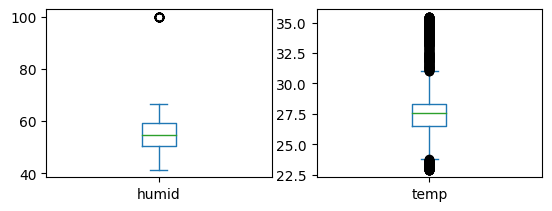

In [145]:
# box and whisker plots to show data distribution
# dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
temp_data.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()



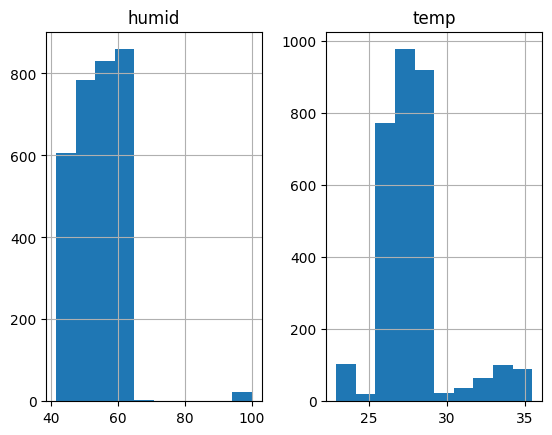

In [146]:
# check the histograms
temp_data.hist()
plt.show()



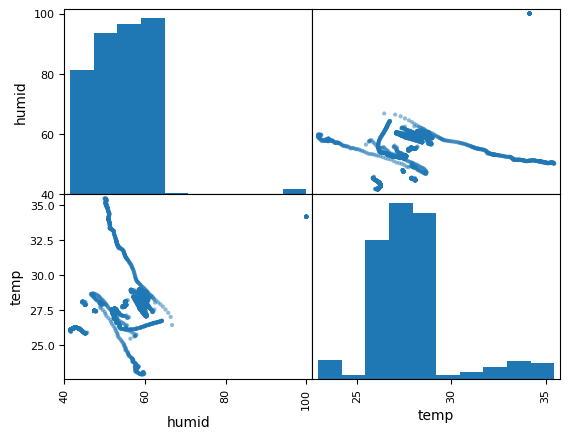

In [147]:
# scatter plot matrix - anything useful here?
scatter_matrix(temp_data)
plt.show()

In [148]:
# size = 30000
# num_train = int(size*0.7)

# # Set the number of testing points
# num_test = size - num_train

# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, train_size=num_train, random_state=125)

# # Show the results of the split
# print ("Training set has {} samples.".format(X_train.shape[0]))
# print ("Testing set has {} samples.".format(X_test.shape[0]))

# Split-out validation dataset
temp_data = temp_data.dropna()
array = temp_data.values
X = array[:,0:2]
# print(X)
Y = array[:,2]
# print(Y)
validation_size = 0.20
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support as score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
import plotly.express as px


In [150]:
temp_data["quality"] = temp_data["quality"].apply(lambda x: x.replace("good", "1"))
temp_data["quality"] = temp_data["quality"].apply(lambda x: x.replace("poor", "0"))
temp_data["quality"] = pandas.to_numeric(temp_data["quality"])
temp_data


<ipython-input-150-aad820e4af94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["quality"] = temp_data["quality"].apply(lambda x: x.replace("good", "1"))
<ipython-input-150-aad820e4af94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["quality"] = temp_data["quality"].apply(lambda x: x.replace("poor", "0"))
<ipython-input-150-aad820e4af94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,humid,temp,quality
0,61.77,27.36,1
1,61.86,27.37,1
2,61.97,27.38,1
3,61.98,27.39,1
4,61.93,27.40,1
...,...,...,...
3105,50.25,35.33,0
3106,50.19,35.39,0
3107,50.11,35.43,0
3108,50.04,35.44,0


In [151]:
# weight_train = compute_sample_weight('balanced', Y_train)
# weight_test = compute_sample_weight('balanced', Y_validation)

# xgb_clf = XGBClassifier(booster='gbtree',
#                         tree_method='gpu_hist',
#                         sampling_method='gradient_based',
#                         eval_metric='aucpr',
#                         objective='multi:softmax',
#                         num_class=6)
# # fit the model to the data
# xgb_clf.fit(X_train, Y_train.ravel(), sample_weight=weight_train)
# score = xgb_clf.score(X_validation, Y_validation.ravel(), sample_weight=weight_test)

# # predict on the test dataset
# y_pred = xgb_clf.predict(X_validation)

# # print a classification report
# results_log = classification_report(Y_validation, y_pred)
# print(results_log)

In [152]:
# # cross validation
# scores  = cross_validate(xgb_clf, X_train, Y_train, cv=10, scoring="f1_weighted", fit_params={ "sample_weight" :weight_train})
# scores_df = pandas.DataFrame(scores)
# px.bar(x=scores_df.index, y=scores_df.test_score, width=800)

In [153]:
# # create predictions on the test dataset
# y_pred = xgb_clf.predict(X_test)

# # print a multi-Class Confusion Matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
# df_cm.index.name = 'Actual'
# df_cm.columns.name = 'Predicted'
# plt.figure(figsize = (8, 5))
# sns.set(font_scale=1.1) #for label size
# sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')

In [154]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [155]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.862338 (0.017088)
LDA: 0.862338 (0.017088)
KNN: 0.992755 (0.005330)
CART: 1.000000 (0.000000)
NB: 0.907418 (0.014784)
SVM: 0.991150 (0.005012)


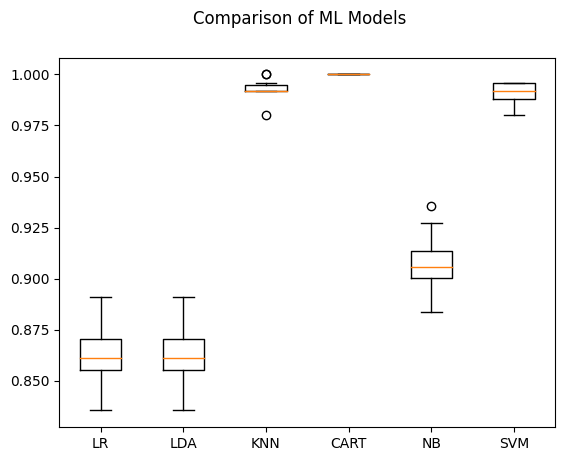

In [156]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comparison of ML Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [157]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
CART = LinearDiscriminantAnalysis()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8808373590982287
[[480   0]
 [ 74  67]]
              precision    recall  f1-score   support

        good       0.87      1.00      0.93       480
        poor       1.00      0.48      0.64       141

    accuracy                           0.88       621
   macro avg       0.93      0.74      0.79       621
weighted avg       0.90      0.88      0.86       621



# Testing value


In [162]:
testHumidity = 140
testTemperature = 26.5
testPrediction = CART.predict([[testHumidity,testTemperature]])
print(testPrediction)

['poor']
